In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

data = {}
data["kmeans_lr"] = pd.read_json("../json/kmeans_lr_1999_2017_cereals_False.json")
data["kmeans_svm"] = pd.read_json("../json/kmeans_svm_1999_2017_cereals_False.json")
data["lvq_lr"] = pd.read_json("../json/lvq_lr_1999_2017_cereals_False.json")
data["lvq_svm"] = pd.read_json("../json/lvq_svm_1999_2017_cereals_False.json")

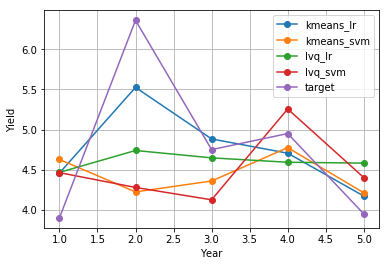

In [2]:
t = np.arange(1, 6, 1)
fig = plt.figure(figsize=(6,4))
plot_2d = fig.add_subplot(111)

plot_2d.set_xlabel("Year")
plot_2d.set_ylabel("Yield")

for key, model in data.items():
    features = model[model["district"] == "Senec"]["features"]
    classifications = [f["properties"]["classification"] for _, feature in features.iteritems() for f in feature]
    plot_2d.plot(t, classifications, marker="o", label=key)
    
one_model = data["kmeans_lr"]
one_features = one_model[one_model["district"] == "Senec"]["features"]
targets = [f["properties"]["yield_value"] for _, feature in one_features.iteritems() for f in feature]
plot_2d.plot(t, targets, marker="o", label="target")

plot_2d.legend()
plot_2d.grid(True, which="major")
fig.savefig(f"pdf/predictions_points.pdf", 
            dpi=600,
            format="pdf", 
            facecolor="none", 
            alpha=0, 
            edgecolor="none", 
            bbox_inches="tight",
            orientation="portrait")